## Task 3 - Assignment 3
## Sujai Rajan
## CS6140

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import make_circles, make_moons
from sklearn.model_selection import KFold, train_test_split
from sklearn.neural_network import MLPClassifier



class SampleData:
    def get_half_circles(self, n_samples, noise=0.05, factor=0.5, random_state=None):
        half_circles = make_circles(n_samples=n_samples, noise=noise, factor=factor, random_state=random_state)
        X = half_circles[0]
        y = half_circles[1]
        y[y == 0] = -1
        return X, y

    def get_moons(self, n_samples, noise=0.05, random_state=None):
        moons = make_moons(n_samples=n_samples, noise=noise, random_state=random_state)
        X = moons[0]
        y = moons[1]
        y[y == 0] = -1
        return X, y

    def visualize_dataset(self, X, y, title):
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
        plt.title(title)
        plt.xlabel("X1")
        plt.ylabel("X2")
        plt.xlim(-2, 2)
        plt.ylim(-2, 2)
        plt.show()

    def visualize_decision_boundary(self, X, y, model, title):
        h = 0.02  # step size in the mesh
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
        plt.title(title)
        plt.xlabel("X1")
        plt.ylabel("X2")
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.show()
        
    def plot(self, X, y):
        ax = plt.gca()
        ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
        plt.show()        

In [2]:
def train_evaluate_network(X_train, X_test, y_train, y_test, hidden_layer_sizes=(10,), max_iter=500, learning_rate_init=0.01):
    clf = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, max_iter=max_iter, alpha=1e-4,
                        solver='adam', verbose=10, random_state=1,
                        learning_rate_init=learning_rate_init)
    clf.fit(X_train, y_train)
    
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    print("Training set score: %f" % train_score)
    print("Test set score    : %f" % test_score)
    
    return clf, train_score, test_score


def k_fold_evaluation(X, y, k=5, hidden_layer_sizes=(10,), max_iter=500, learning_rate_init=0.01):
    kf = KFold(n_splits=k)
    test_scores = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        clf = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, max_iter=max_iter, alpha=1e-4,
                            solver='adam', verbose=10, random_state=1,
                            learning_rate_init=learning_rate_init)
        clf.fit(X_train, y_train)
        test_score = clf.score(X_test, y_test)
        test_scores.append(test_score)

    mean_test_score = np.mean(test_scores)
    return mean_test_score

In [3]:
# Generate the half-circles dataset
sample = SampleData()
X_half_circles, y_half_circles = sample.get_half_circles(n_samples=5251, noise=0.05, factor=0.5)
X_train_half_circles, X_test_half_circles, y_train_half_circles, y_test_half_circles = train_test_split(
    X_half_circles, y_half_circles, test_size=0.3, random_state=1)

# Train and evaluate the MLP model on the half-circles dataset
mlp_half_circles, train_score_half_circles, test_score_half_circles = train_evaluate_network(
    X_train_half_circles, X_test_half_circles, y_train_half_circles, y_test_half_circles, hidden_layer_sizes=(5,), max_iter=1000, learning_rate_init=0.01)

# Perform k-fold cross-validation on the half-circles dataset
kfold_score_half_circles = k_fold_evaluation(X_half_circles, y_half_circles, hidden_layer_sizes=(5,), max_iter=1000, learning_rate_init=0.01)

Iteration 1, loss = 0.69769158
Iteration 2, loss = 0.68035857
Iteration 3, loss = 0.65986874
Iteration 4, loss = 0.63054555
Iteration 5, loss = 0.59665973
Iteration 6, loss = 0.55562082
Iteration 7, loss = 0.50323872
Iteration 8, loss = 0.45340201
Iteration 9, loss = 0.40737251
Iteration 10, loss = 0.36591550
Iteration 11, loss = 0.32937198
Iteration 12, loss = 0.29781929
Iteration 13, loss = 0.27108747
Iteration 14, loss = 0.24817027
Iteration 15, loss = 0.22879263
Iteration 16, loss = 0.21218648
Iteration 17, loss = 0.19785130
Iteration 18, loss = 0.18554525
Iteration 19, loss = 0.17469039
Iteration 20, loss = 0.16498839
Iteration 21, loss = 0.15637919
Iteration 22, loss = 0.14910112
Iteration 23, loss = 0.14242861
Iteration 24, loss = 0.13610335
Iteration 25, loss = 0.13040368
Iteration 26, loss = 0.12516810
Iteration 27, loss = 0.12061865
Iteration 28, loss = 0.11640391
Iteration 29, loss = 0.11259733
Iteration 30, loss = 0.10862286
Iteration 31, loss = 0.10508820
Iteration 32, los

In [4]:
print("Half-Circles - K-Fold Cross-Validation Score: %.4f" % kfold_score_half_circles)

Half-Circles - K-Fold Cross-Validation Score: 1.0000


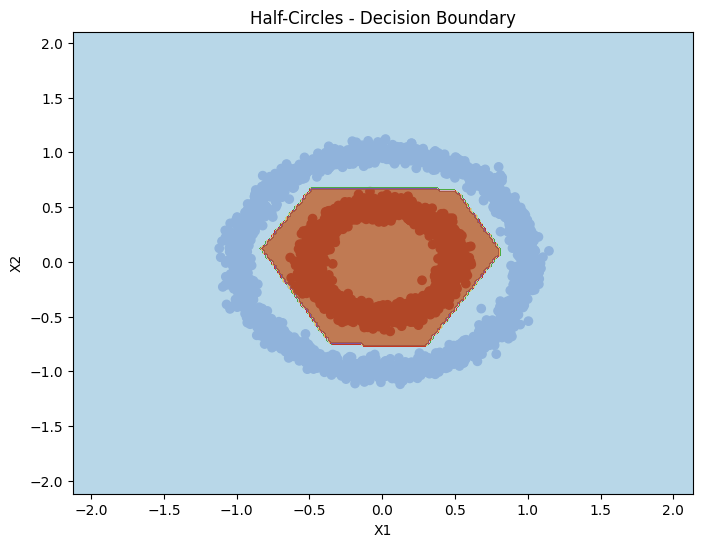

In [5]:
# Visualize the decision boundary for the half-circles dataset
plt.figure(figsize=(8, 6))
plt.scatter(X_train_half_circles[:, 0], X_train_half_circles[:, 1], c=y_train_half_circles, cmap='coolwarm')
plt.title("Half-Circles - Decision Boundary")
plt.xlabel("X1")
plt.ylabel("X2")

# Generate a mesh grid to plot the decision boundary
h_half_circles = 0.02  # step size in the mesh
x_min_half_circles, x_max_half_circles = X_half_circles[:, 0].min() - 1, X_half_circles[:, 0].max() + 1
y_min_half_circles, y_max_half_circles = X_half_circles[:, 1].min() - 1, X_half_circles[:, 1].max() + 1
xx_half_circles, yy_half_circles = np.meshgrid(np.arange(x_min_half_circles, x_max_half_circles, h_half_circles), np.arange(y_min_half_circles, y_max_half_circles, h_half_circles))
Z_half_circles = mlp_half_circles.predict(np.c_[xx_half_circles.ravel(), yy_half_circles.ravel()])
Z_half_circles = Z_half_circles.reshape(xx_half_circles.shape)

# Plot the decision boundary
plt.contourf(xx_half_circles, yy_half_circles, Z_half_circles, cmap=plt.cm.Paired, alpha=0.8)
plt.show()

In [6]:
# Generate the moons dataset
X_moons, y_moons = sample.get_moons(n_samples=5550, noise=0.05)
X_train_moons, X_test_moons, y_train_moons, y_test_moons = train_test_split(
    X_moons, y_moons, test_size=0.3, random_state=1)

# Train and evaluate the MLP model on the moons dataset
mlp_moons, train_score_moons, test_score_moons = train_evaluate_network(
    X_train_moons, X_test_moons, y_train_moons, y_test_moons, hidden_layer_sizes=(12,), max_iter=200, learning_rate_init=0.1)

# Perform k-fold cross-validation on the moons dataset
kfold_score_moons = k_fold_evaluation(X_moons, y_moons, hidden_layer_sizes=(12,), max_iter=200, learning_rate_init=0.1)

Iteration 1, loss = 0.30897497
Iteration 2, loss = 0.16580586
Iteration 3, loss = 0.08103896
Iteration 4, loss = 0.02672700
Iteration 5, loss = 0.01053602
Iteration 6, loss = 0.00594763
Iteration 7, loss = 0.00408593
Iteration 8, loss = 0.00308124
Iteration 9, loss = 0.00246223
Iteration 10, loss = 0.00206204
Iteration 11, loss = 0.00180885
Iteration 12, loss = 0.00155430
Iteration 13, loss = 0.00133986
Iteration 14, loss = 0.00118238
Iteration 15, loss = 0.00103369
Iteration 16, loss = 0.00098801
Iteration 17, loss = 0.00086800
Iteration 18, loss = 0.00080866
Iteration 19, loss = 0.00073700
Iteration 20, loss = 0.00069477
Iteration 21, loss = 0.00064735
Iteration 22, loss = 0.00061082
Iteration 23, loss = 0.00057359
Iteration 24, loss = 0.00053603
Iteration 25, loss = 0.00050684
Iteration 26, loss = 0.00048098
Iteration 27, loss = 0.00046466
Iteration 28, loss = 0.00043619
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training set score: 1.0

In [7]:
print("Moons - K-Fold Cross-Validation Score: %.4f" % kfold_score_moons)

Moons - K-Fold Cross-Validation Score: 1.0000


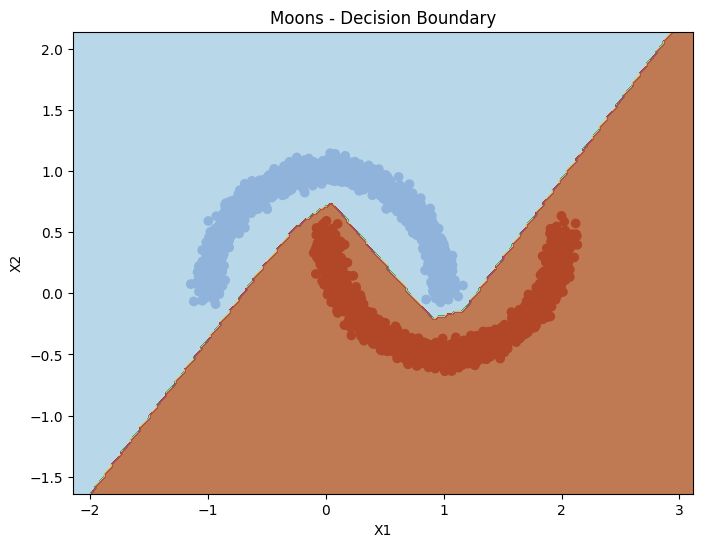

In [8]:
# Visualize the decision boundary for the moons dataset
plt.figure(figsize=(8, 6))
plt.scatter(X_train_moons[:, 0], X_train_moons[:, 1], c=y_train_moons, cmap='coolwarm')
plt.title("Moons - Decision Boundary")
plt.xlabel("X1")
plt.ylabel("X2")

# Generate a mesh grid to plot the decision boundary
h_moons = 0.02  # step size in the mesh
x_min_moons, x_max_moons = X_moons[:, 0].min() - 1, X_moons[:, 0].max() + 1
y_min_moons, y_max_moons = X_moons[:, 1].min() - 1, X_moons[:, 1].max() + 1
xx_moons, yy_moons = np.meshgrid(np.arange(x_min_moons, x_max_moons, h_moons), np.arange(y_min_moons, y_max_moons, h_moons))
Z_moons = mlp_moons.predict(np.c_[xx_moons.ravel(), yy_moons.ravel()])
Z_moons = Z_moons.reshape(xx_moons.shape)

# Plot the decision boundary
plt.contourf(xx_moons, yy_moons, Z_moons, cmap=plt.cm.Paired, alpha=0.8)
plt.show()

In [9]:
y_pred_half_circles = mlp_half_circles.predict(X_test_half_circles)
y_pred_moons = mlp_moons.predict(X_test_moons)

In [10]:
# Calculate and print the confusion matrix
cm_half_circles = confusion_matrix(y_test_half_circles, y_pred_half_circles)
print("Confusion Matrix - Half-Circles:")
print(cm_half_circles)

cm_moons = confusion_matrix(y_test_moons, y_pred_moons)
print("Confusion Matrix - Moons:")
print(cm_moons)

Confusion Matrix - Half-Circles:
[[773   0]
 [  0 803]]
Confusion Matrix - Moons:
[[850   0]
 [  0 815]]


In [11]:
# Print the classification report
classification_rep_half_circles = classification_report(y_test_half_circles, y_pred_half_circles)
print("Classification Report - Half-Circles:")
print(classification_rep_half_circles)

classification_rep_moons = classification_report(y_test_moons, y_pred_moons)
print("Classification Report - Moons:")
print(classification_rep_moons)

Classification Report - Half-Circles:
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       773
           1       1.00      1.00      1.00       803

    accuracy                           1.00      1576
   macro avg       1.00      1.00      1.00      1576
weighted avg       1.00      1.00      1.00      1576

Classification Report - Moons:
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       850
           1       1.00      1.00      1.00       815

    accuracy                           1.00      1665
   macro avg       1.00      1.00      1.00      1665
weighted avg       1.00      1.00      1.00      1665



In [12]:
# Calculate and print the accuracy score
accuracy_half_circles = accuracy_score(y_test_half_circles, y_pred_half_circles)
print("Accuracy - Half-Circles: ", accuracy_half_circles)

accuracy_moons = accuracy_score(y_test_moons, y_pred_moons)
print("Accuracy - Moons: ", accuracy_moons)

Accuracy - Half-Circles:  1.0
Accuracy - Moons:  1.0


## Rational behind the training process and design parameters

The training process and design parameters play a crucial role in determining the performance of the machine learning models. In the provided code, an MLP (Multi-Layer Perceptron) model is trained using the MLPClassifier class from scikit-learn.
The design parameters of the MLP model include:

hidden_layer_sizes: The number of neurons in each hidden layer. Choosing the appropriate number of neurons in the hidden layers depends on the complexity of the dataset and the model's capacity to learn. In the code, (5,) and (12,) are used as the hidden layer sizes for the half-circles and moons datasets, respectively.

max_iter: The maximum number of iterations or epochs for which the model will be trained. Setting an appropriate number of iterations ensures that the model has enough training time to converge. 

learning_rate_init: The initial learning rate for the model. It determines the step size in updating the weights during training. An appropriate learning rate is crucial for efficient convergence and avoiding overshooting or slow convergence. In the code, 0.01 and 0.1 are used as the learning rates for the half-circles and moons datasets, respectively.

The training process involves feeding the training data (X_train) and corresponding labels (y_train) to the MLP model. The model adjusts its internal weights and biases iteratively through forward and backward propagation to minimize the loss function. The fit method of the MLPClassifier class is used to train the model on the provided data.

The 'Adam' optimizer is being exploited because it operates well in actual situations.

The goal of the training process is to find optimal weights and biases that minimize the difference between predicted and actual labels, maximizing the accuracy of the model's predictions. The choice of design parameters, such as hidden layer sizes, maximum iterations, and learning rate, is based on empirical experimentation and tuning. Different values for these parameters can affect the model's performance, convergence speed, and generalization ability.

## Comparison of SVM and MLP solutions in terms of computational cost

Even though SVM can handle non-linear boundaries well, MLP tend to be stronger as they relax the constraint given by the structures of SVM meaning that MLP might completely different decision boundaries depending on the hidden layer structure.

SVM with kernels: In Task 2, the SVM model was used with different kernel functions, such as linear, polynomial, RBF, sigmoid, exponential, and Laplacian. SVM with kernels involves solving a quadratic programming problem to find the support vectors, which can be computationally expensive. The time complexity of SVM depends on the number of support vectors, which can be substantial in high-dimensional spaces or when dealing with large datasets. Additionally, using certain kernel functions, such as RBF, may require more computational resources.

MLP: In Task 3, MLP was used for training and evaluating neural networks. MLP training involves forward and backward propagation, where the weights are adjusted iteratively using gradient descent. The time complexity of MLP training is typically determined by the number of iterations (max_iter) and the size of the neural network (number of layers and neurons). However, compared to SVM with kernels, MLP training is generally faster, especially for smaller datasets and network architectures.

Overall, the computational cost of SVM with kernels can be higher than that of MLP, particularly for large datasets or complex kernel functions. MLP training is generally more scalable and can be trained efficiently on modern hardware, including GPUs. It is also worth noting that the SVM model is faster without kernals involved.